In [1]:
pip install kagglehub seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "layoffs.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "swaptr/layoffs-2022",
  file_path,
)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\user\AppData\Local\Temp\ipykernel_14040\3746379681.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 696k/696k [00:01<00:00, 592kB/s]


In [3]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,LeddarTech,"Quebec,Non-U.S.",138.0,5/22/2025,95%,Transportation,https://betakit.com/leddartech-cuts-95-percent...,Post-IPO,$402,Canada,5/22/2025
1,Climeworks,"Zurich,Non-U.S.",106.0,5/21/2025,22%,Energy,https://www.bloomberg.com/news/articles/2025-0...,Private Equity,$734,Switzerland,5/22/2025
2,Builder.ai,"London,Non-U.S.",NaN,5/20/2025,100%,AI,https://techcrunch.com/2025/05/20/once-worth-o...,Series D,$445,United States,5/22/2025
3,Blink Charging,Baltimore,NaN,5/19/2025,20%,Other,https://blinkcharging.com/news/blink-charging-...,Post-IPO,$110,United States,5/22/2025
4,VerSe Innovation copy,"Bengaluru,Non-U.S.",350.0,5/18/2025,NaN,Media,https://inc42.com/buzz/josh-dailyhunt-parent-v...,Series J,$1700,India,5/22/2025


In [4]:
df.shape

(4072, 11)

In [5]:
df.describe()

,total_laid_off
count,2657.000000
mean,278.903274
std,962.416857
min,3.000000
25%,40.000000
50%,85.000000
75%,200.000000
max,22000.000000


In [6]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1415
date                      0
percentage_laid_off    1481
industry                  1
source                    3
stage                     7
funds_raised            447
country                   0
date_added                0
dtype: int64

In [7]:
df.dropna(subset=['location', 'total_laid_off', 'industry', 'stage', 'source', 'percentage_laid_off'], inplace=True)

In [8]:
df.isnull().sum()

company                  0
location                 0
total_laid_off           0
date                     0
percentage_laid_off      0
industry                 0
source                   0
stage                    0
funds_raised           173
country                  0
date_added               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

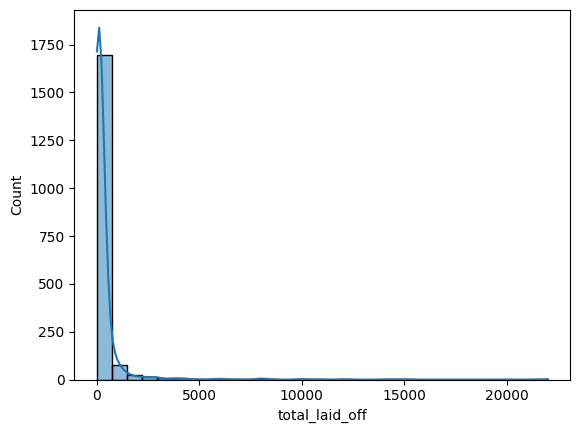

In [11]:
sns.histplot(data=df, x='total_laid_off', bins=30, kde=True)
plt.show()

In [12]:
df.shape

(1840, 11)

In [13]:
count = (df['total_laid_off'] < 1000).sum()
print(count)
#ok fine (note: dicoba jadi variable thresholdnya)

1733


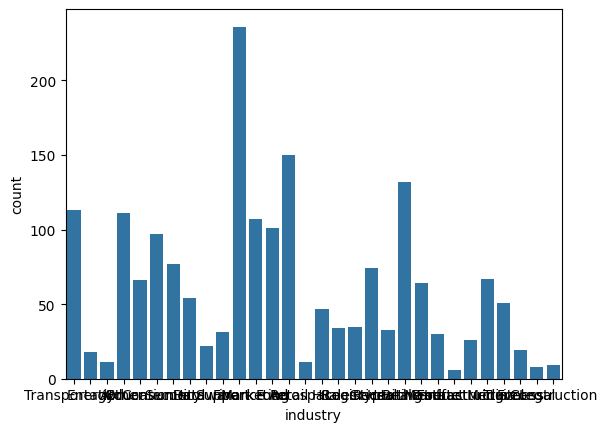

In [14]:
sns.countplot(data=df, x='industry')
plt.show()

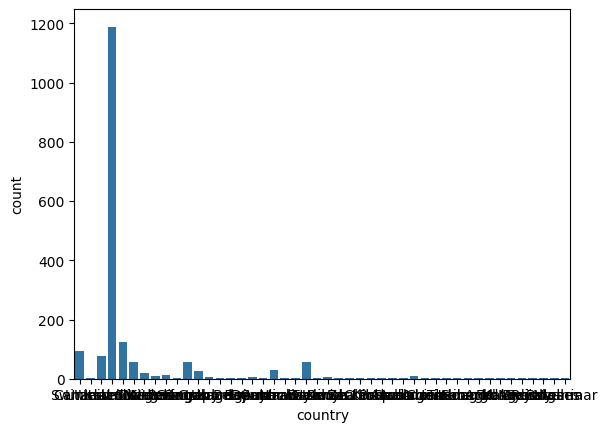

In [15]:
sns.countplot(data=df, x='country')
plt.show()

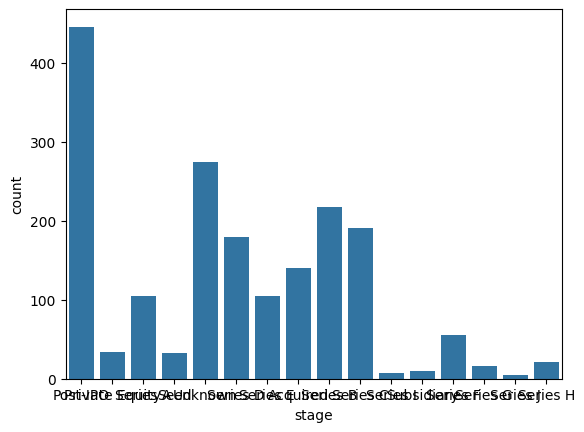

In [16]:
sns.countplot(data=df, x='stage')
plt.show()

In [20]:
df['percentage_laid_off'] = df['percentage_laid_off'].str.rstrip('%').astype(float)

In [21]:
df.to_csv('layoffs.csv', index=False)